<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
# Veri setini yükleme
data = pd.read_csv('Churn_Modelling.csv')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

ValueError: could not convert string to float: 'France'

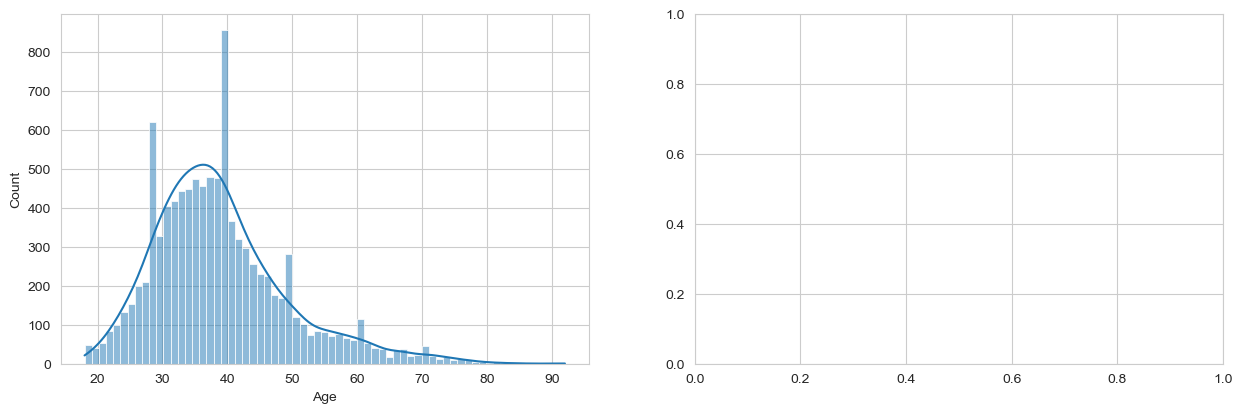

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], kde=True)
plt.subplot(2, 2, 2)
sns.countplot(data['Geography'])
plt.subplot(2, 2, 3)
sns.countplot(data['Gender'])
plt.subplot(2, 2, 4)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Kategorik değişkenlerin dummy değişkenlere dönüştürülmesi
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [12]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,False,False,False
1,608,41,1,83807.860,1,0,1,112542.580,0,False,True,False
2,502,42,8,159660.800,3,1,0,113931.570,1,False,False,False
3,699,39,1,0.000,2,0,0,93826.630,0,False,False,False
4,850,43,2,125510.820,1,1,1,79084.100,0,False,True,False


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


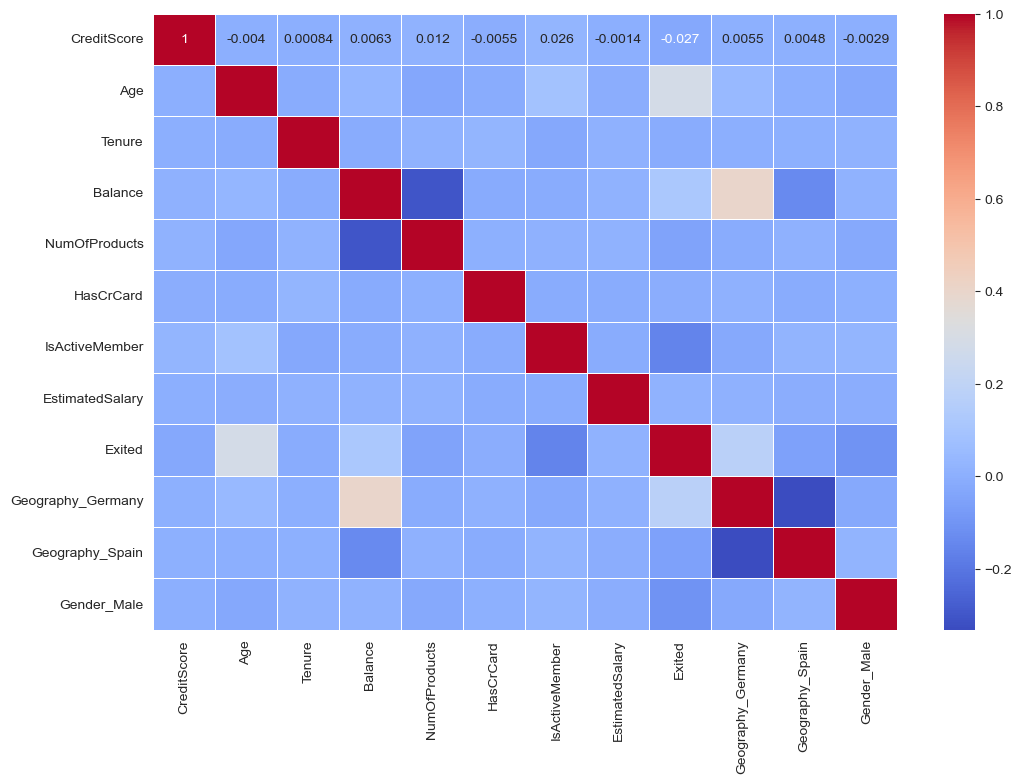

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

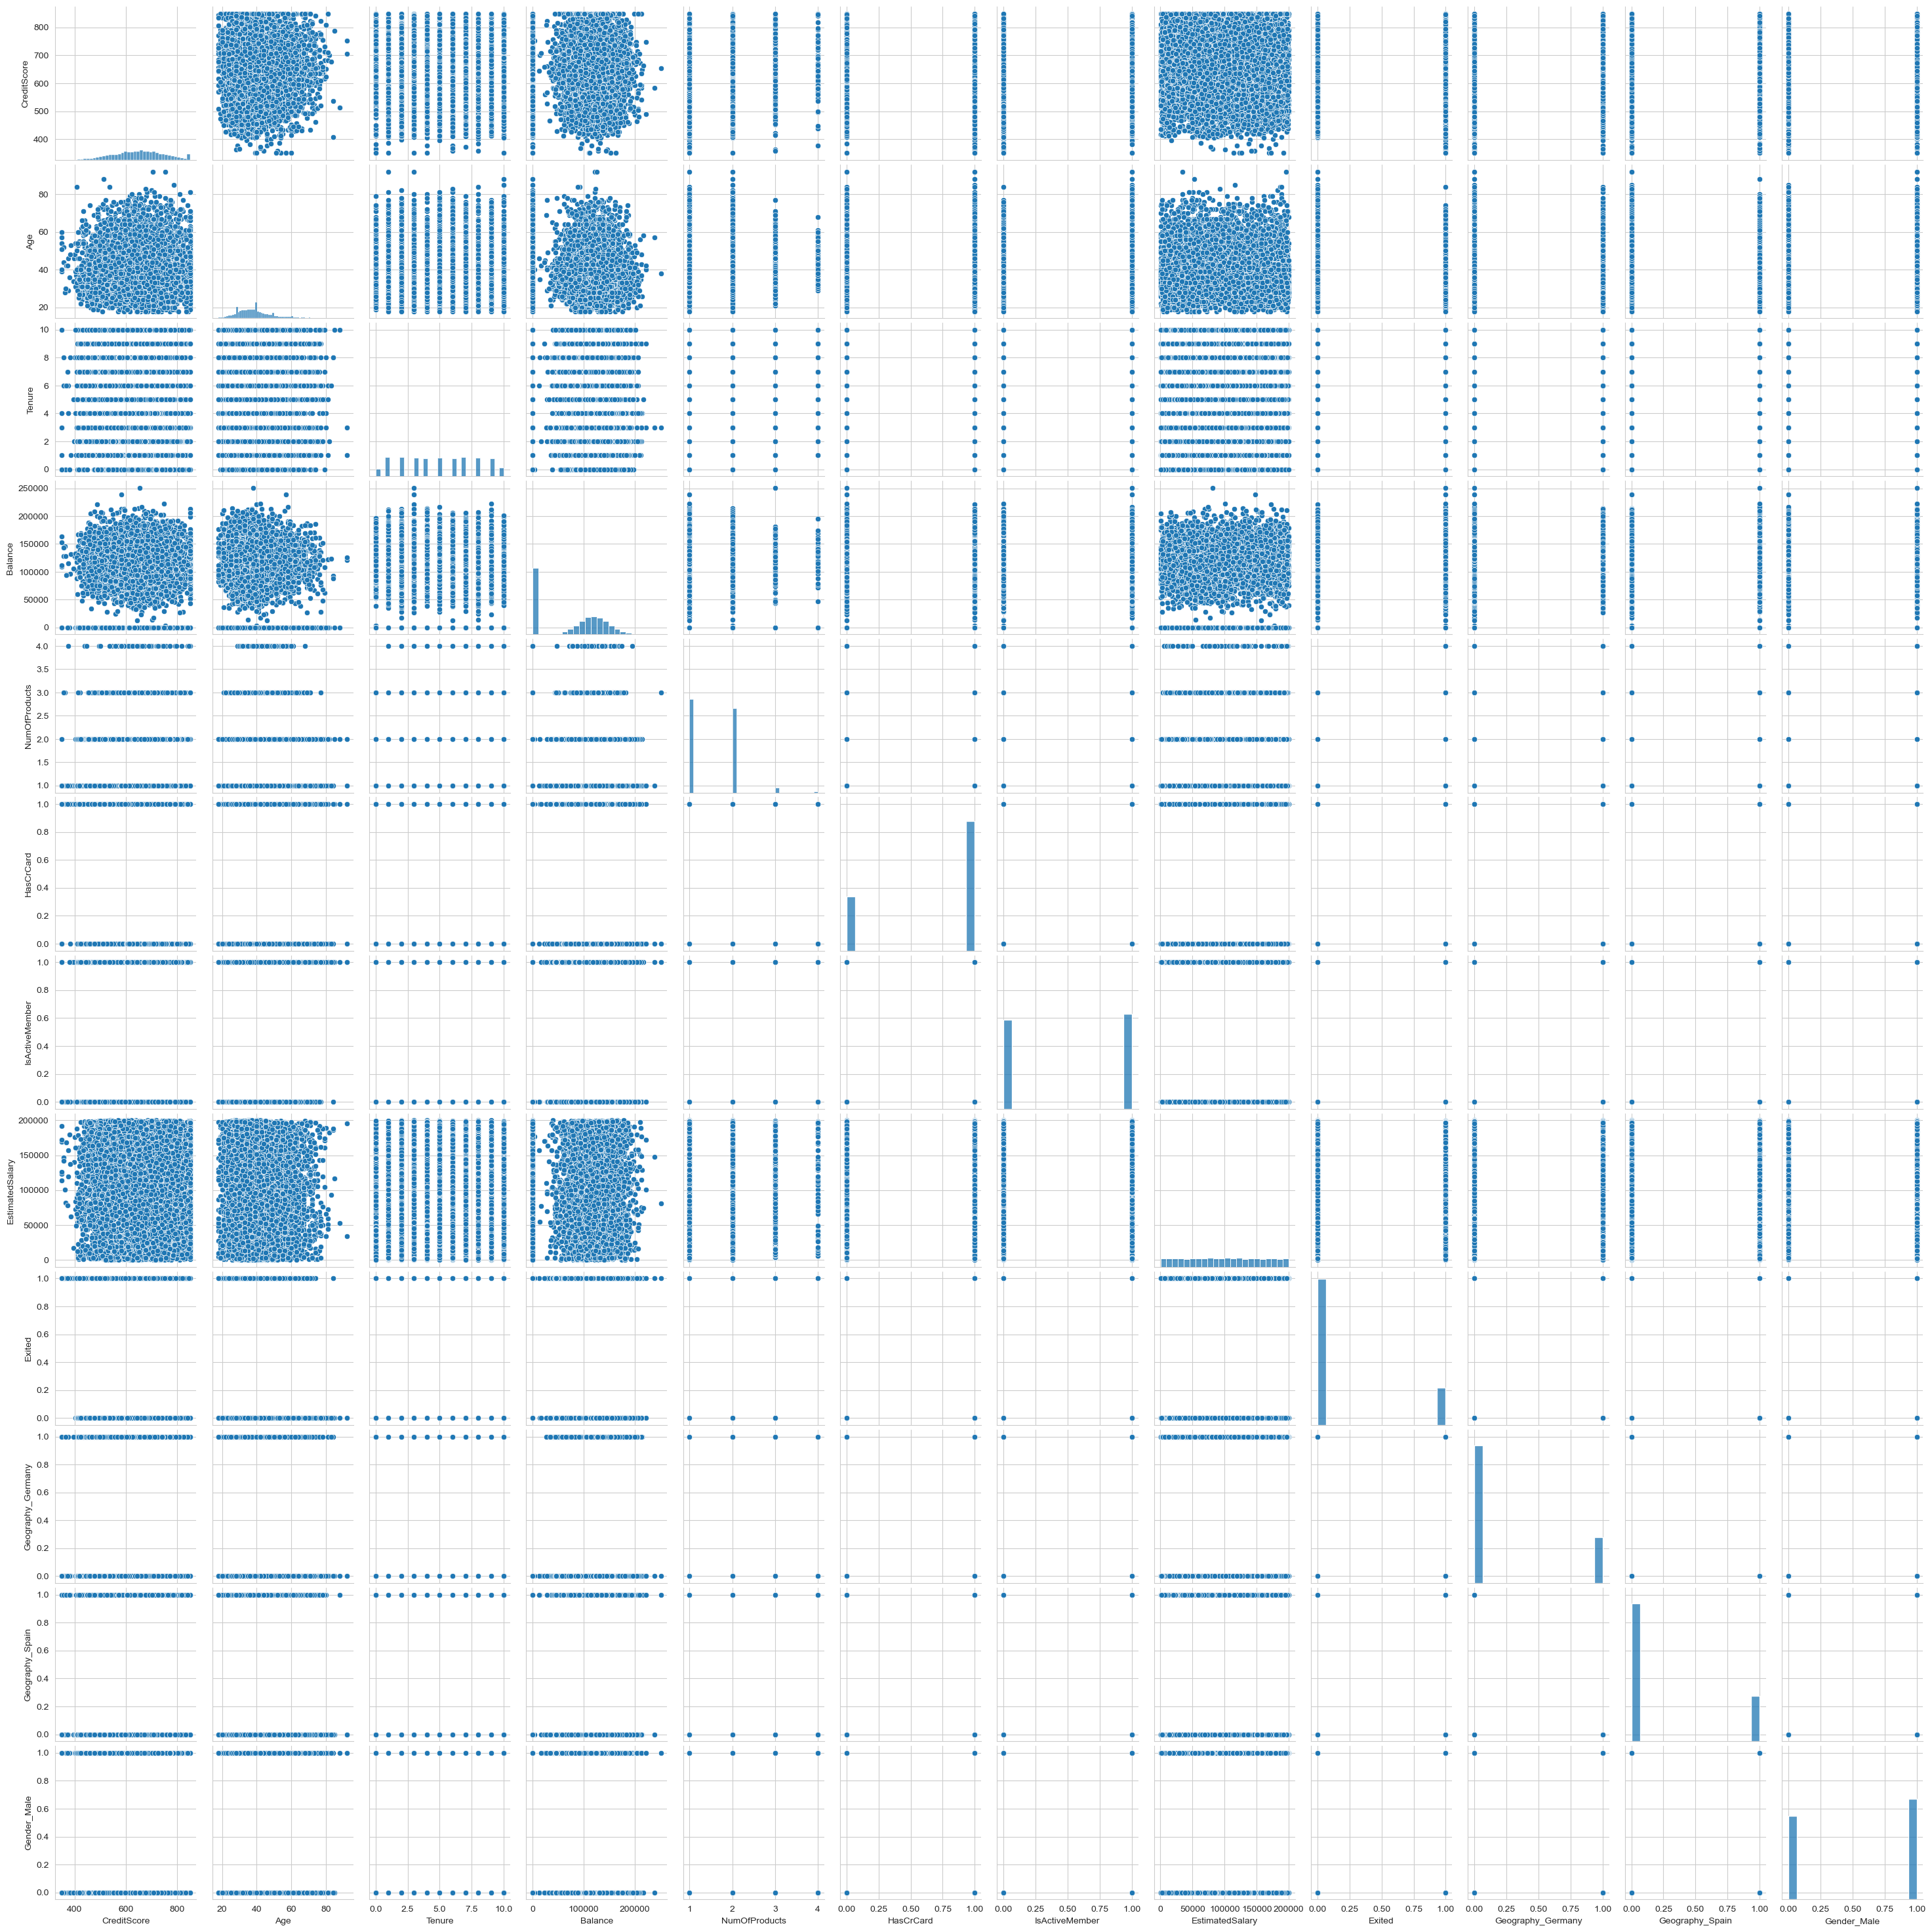

In [15]:
sns.pairplot(data)

# Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
# Train ve test setlerine ayırma
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Veriyi normalize etme
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [18]:
# Modelin oluşturulması
model = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [19]:
# Modelin derlenmesi
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# Modelin eğitilmesi
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


250/250 [==============================] - 2s 4ms/step - loss: 0.5911 - accuracy: 0.7135 - val_loss: 0.5049 - val_accuracy: 0.8015
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5047 - accuracy: 0.7941 - val_loss: 0.4701 - val_accuracy: 0.8035
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4798 - accuracy: 0.7945 - val_loss: 0.4506 - val_accuracy: 0.8030
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4600 - accuracy: 0.7941 - val_loss: 0.4318 - val_accuracy: 0.8020
Epoch 5/100
 93/250 [==========>...................] - ETA: 0s - loss: 0.4399 - accuracy: 0.79

limit_output extension: Maximum message size of 10000 exceeded with 10089 characters

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [21]:
# Modelin değerlendirilmesi
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

63/63 - 0s - loss: 0.3293 - accuracy: 0.8625 - 169ms/epoch - 3ms/step

Test accuracy: 0.862500011920929


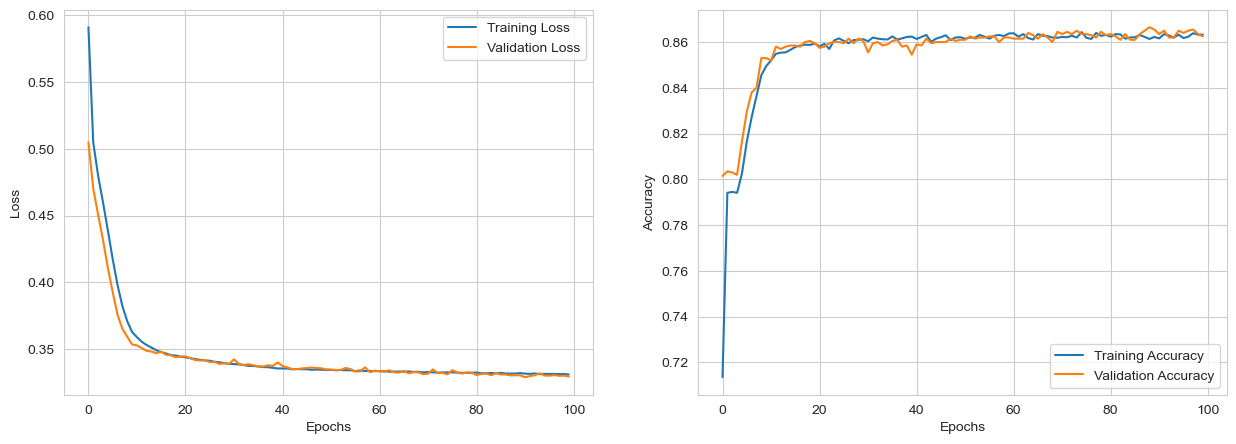

In [22]:
# Modelin performansının görselleştirilmesi
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# Tahminlerin yapılması
predictions = model.predict(X_test)
y_pred = (predictions > 0.5)

63/63 [==============================] - 0s 2ms/step


In [24]:
# Confusion Matrix ve Sınıflandırma Raporunun Oluşturulması
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[1543   64]
 [ 211  182]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [25]:
# ROC ve AUC değerlerinin hesaplanması
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("\nROC AUC:", roc_auc)


ROC AUC: 0.8659807363142485


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [26]:
# Modelin oluşturulması
model_weight = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [27]:
# Modelin derlenmesi (class_weight kullanarak)
model_weight.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [28]:
# Modelin eğitilmesi (class_weight kullanarak)
history_weight = model_weight.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), class_weight={0: 1, 1: 2})

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.7419 - accuracy: 0.7945 - val_loss: 0.5066 - val_accuracy: 0.7985
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6893 - accuracy: 0.7870 - val_loss: 0.4694 - val_accuracy: 0.7825
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6559 - accuracy: 0.7710 - val_loss: 0.4703 - val_accuracy: 0.7755
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6371 - accuracy: 0.7

limit_output extension: Maximum message size of 10000 exceeded with 10046 characters

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [29]:
# Modelin değerlendirilmesi
test_loss_weight, test_acc_weight = model_weight.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy (with class_weight):', test_acc_weight)

63/63 - 0s - loss: 0.3890 - accuracy: 0.8345 - 160ms/epoch - 3ms/step

Test accuracy (with class_weight): 0.8345000147819519


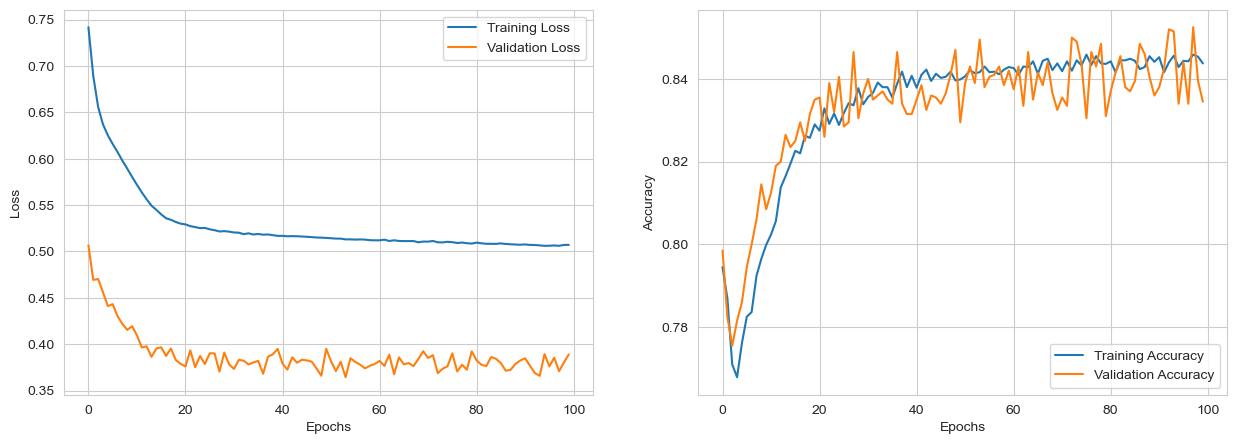

In [30]:
# Modelin performansının görselleştirilmesi
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_weight.history['loss'], label='Training Loss')
plt.plot(history_weight.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_weight.history['accuracy'], label='Training Accuracy')
plt.plot(history_weight.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
# Tahminlerin yapılması
predictions_weight = model_weight.predict(X_test)
y_pred_weight = (predictions_weight > 0.5)

63/63 [==============================] - 0s 1ms/step


In [32]:
# Confusion Matrix ve Sınıflandırma Raporunun Oluşturulması
cm_weight = confusion_matrix(y_test, y_pred_weight)
print("Confusion Matrix (with class_weight):")
print(cm_weight)
cr_weight = classification_report(y_test, y_pred_weight)
print("\nClassification Report (with class_weight):")
print(cr_weight)

Confusion Matrix (with class_weight):
[[1414  193]
 [ 138  255]]

Classification Report (with class_weight):
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1607
           1       0.57      0.65      0.61       393

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.84      2000



In [33]:
# ROC ve AUC değerlerinin hesaplanması
fpr_weight, tpr_weight, thresholds_weight = roc_curve(y_test, predictions_weight)
roc_auc_weight = auc(fpr_weight, tpr_weight)
print("\nROC AUC (with class_weight):", roc_auc_weight)


ROC AUC (with class_weight): 0.8514189669559545


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [34]:
# Yüksek learning rate ile modelin oluşturulması
model_high_lr = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [35]:
# Modelin derlenmesi
model_high_lr.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [36]:
# Modelin eğitilmesi
history_high_lr = model_high_lr.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.4514 - accuracy: 0.8005 - val_loss: 0.4124 - val_accuracy: 0.8420
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3918 - accuracy: 0.8462 - val_loss: 0.3708 - val_accuracy: 0.8475
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3794 - accuracy: 0.8528 - val_loss: 0.3754 - val_accuracy: 0.8405
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3771 - accuracy: 0.8534 - val_loss: 0.3711 - val_accuracy: 0.8515
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3769 - accuracy: 0.8547 - val_loss: 0.3603 - val_accuracy: 0.8505
Epoch 6/100
 26/250 [==>...........................] - ETA: 0s - loss: 0.3981 - accuracy: 0.840

limit_output extension: Maximum message size of 10000 exceeded with 10118 characters

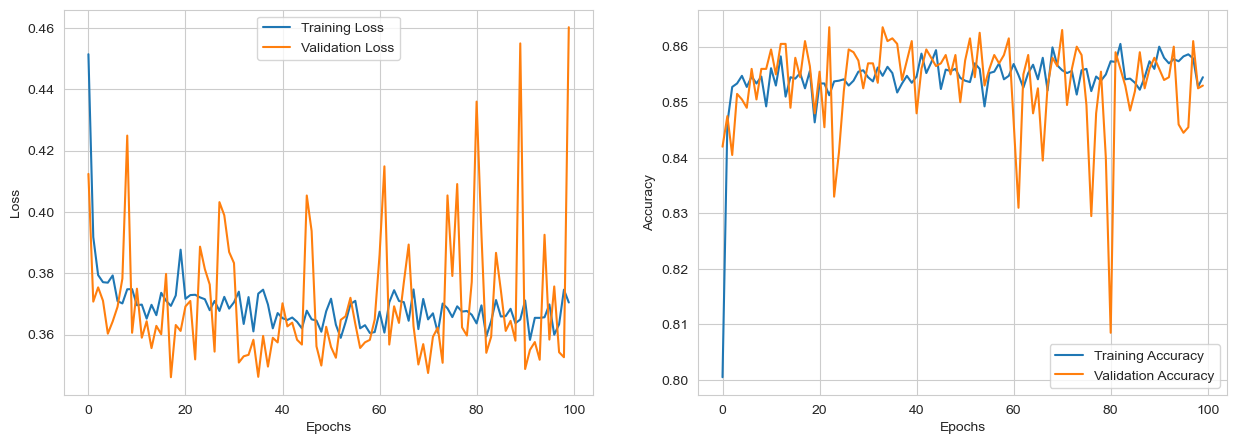

In [37]:
# Modelin performansının görselleştirilmesi
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_high_lr.history['loss'], label='Training Loss')
plt.plot(history_high_lr.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_high_lr.history['accuracy'], label='Training Accuracy')
plt.plot(history_high_lr.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Add Dropout Layer

In [38]:
# Dropout katmanı eklenmiş modelin oluşturulması
model_dropout = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [39]:
# Modelin derlenmesi
model_dropout.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [40]:
# Modelin eğitilmesi
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.6249 - accuracy: 0.7505 - val_loss: 0.5218 - val_accuracy: 0.8035
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5521 - accuracy: 0.7909 - val_loss: 0.4908 - val_accuracy: 0.8035
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5206 - accuracy: 0.7944 - val_loss: 0.4717 - val_accuracy: 0.8035
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5131 - accuracy: 0.7944 - val_loss: 0.4645 - val_accuracy: 0.8035
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5042 - accuracy: 0.7945 - val_loss: 0.4566 - val_accuracy: 0.8035
Epoch 6/100
  1/250 [..............................] - ETA: 0s - loss: 0.5972 - accuracy: 0.750

limit_output extension: Maximum message size of 10000 exceeded with 10118 characters

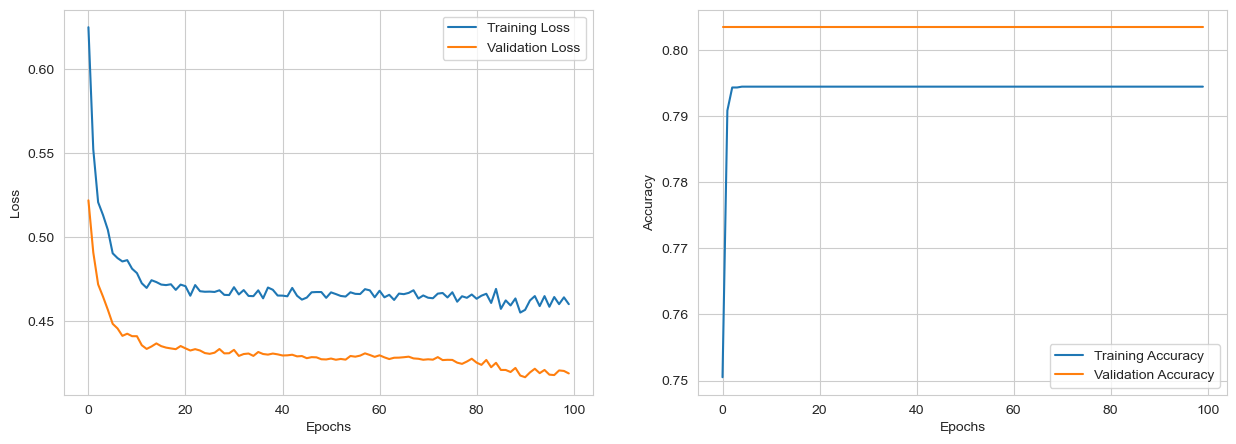

In [41]:
# Modelin performansının görselleştirilmesi
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Add Early Stop

#### Monitor the "val_loss" as metric

In [42]:
# Early stopping ile modelin oluşturulması ve eğitilmesi
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_early_stop = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [43]:
model_early_stop.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

history_early_stop = model_early_stop.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5652 - accuracy: 0.7542 - val_loss: 0.4877 - val_accuracy: 0.8035
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4818 - accuracy: 0.7946 - val_loss: 0.4474 - val_accuracy: 0.8040
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4534 - accuracy: 0.7960 - val_loss: 0.4262 - val_accuracy: 0.8080
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.7983 - val_loss: 0.4155 - val_accuracy: 0.8025
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4283 - accuracy: 0.8046 - val_loss: 0.4092 - val_accuracy: 0.8080
Epoch 6/100
 53/250 [=====>........................] - ETA: 0s - loss: 0.4214 - accuracy: 0.803

limit_output extension: Maximum message size of 10000 exceeded with 10118 characters

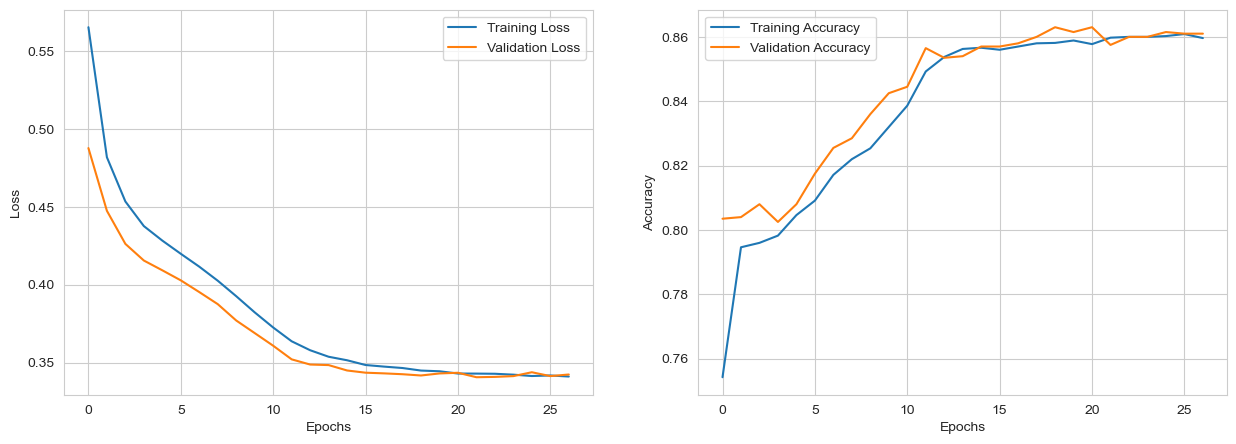

In [44]:
# Modelin performansının görselleştirilmesi
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_early_stop.history['loss'], label='Training Loss')
plt.plot(history_early_stop.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_early_stop.history['accuracy'], label='Training Accuracy')
plt.plot(history_early_stop.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
# val_loss'un izlenmesi ile modelin oluşturulması ve eğitilmesi
model_monitor_val_loss = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_monitor_val_loss.compile(optimizer='adam',
                               loss='binary_crossentropy',
                               metrics=['accuracy'])

history_monitor_val_loss = model_monitor_val_loss.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)])

# Modelin performansının görselleştirilmesi
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_monitor_val_loss.history['loss'], label='Training Loss')
plt.plot(history_monitor_val_loss.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_monitor_val_loss.history['accuracy'], label='Training Accuracy')
plt.plot(history_monitor_val_loss.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.6962 - accuracy: 0.5991 - val_loss: 0.5183 - val_accuracy: 0.7920
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4851 - accuracy: 0.8043 - val_loss: 0.4484 - val_accuracy: 0.8200
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4387 - accuracy: 0.8170 - val_loss: 0.4187 - val_accuracy: 0.8260
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.8263 - val_loss: 0.4038 - val_accuracy: 0.8320
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4026 - accuracy: 0.8315 - val_loss: 0.3892 - val_accuracy: 0.8405
Epoch 6/100
  1/250 [..............................] - ETA: 2s - loss: 0.2765 - accuracy: 0.843

limit_output extension: Maximum message size of 10000 exceeded with 10118 characters

#### Monitor the "val_recall" as metric

In [46]:
# val_recall'ı izleyerek modelin oluşturulması ve eğitilmesi
model_monitor_val_recall = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_monitor_val_recall.compile(optimizer='adam',
                                 loss='binary_crossentropy',
                                 metrics=['accuracy', tf.keras.metrics.Recall()])

history_monitor_val_recall = model_monitor_val_recall.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath='best_model_recall.h5', monitor='val_recall', save_best_only=True)])

# Modelin performansının görselleştirilmesi
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_monitor_val_recall.history['loss'], label='Training Loss')
plt.plot(history_monitor_val_recall.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_monitor_val_recall.history['accuracy'], label='Training Accuracy')
plt.plot(history_monitor_val_recall.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.5635 - accuracy: 0.7639 - recall: 0.0225 - val_loss: 0.4816 - val_accuracy: 0.8035 - val_recall: 0.0000e+00
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4749 - accuracy: 0.7945 - recall: 0.0000e+00 - val_loss: 0.4469 - val_accuracy: 0.8035 - val_recall: 0.0000e+00
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4549 - accuracy: 0.7945 - recall: 0.0000e+00 - val_loss: 0.4329 - val_accuracy: 0.8035 - val_recall: 0.0000e+00
Epoch 4/100
215/250 [=====================>........] - ETA: 0s - loss: 0.4417 - accuracy: 0.7985 - recall: 0.0000e+0

limit_output extension: Maximum message size of 10000 exceeded with 10089 characters

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

In [54]:
# En iyi parametrelerle modelin oluşturulması
final_model = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

final_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [55]:
# Modelin eğitilmesi
final_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.5904 - accuracy: 0.7219 - val_loss: 0.4857 - val_accuracy: 0.8035
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4724 - accuracy: 0.7960 - val_loss: 0.4454 - val_accuracy: 0.8070
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4493 - accuracy: 0.8030 - val_loss: 0.4271 - val_accuracy: 0.8105
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4378 - accuracy: 0.8077 - val_loss: 0.4177 - val_accuracy: 0.8160
Epoch 5/100
249/250 [============================>.] - ETA: 0s - loss: 0.4310 - accuracy: 0.81

limit_output extension: Maximum message size of 10000 exceeded with 10190 characters

In [56]:
# Modelin test verisi üzerinde değerlendirilmesi
test_loss_final, test_acc_final = final_model.evaluate(X_test, y_test, verbose=2)
print('\nFinal Test accuracy:', test_acc_final)

63/63 - 0s - loss: 0.3347 - accuracy: 0.8585 - 143ms/epoch - 2ms/step

Final Test accuracy: 0.8585000038146973


In [57]:
# Tahminlerin yapılması
predictions_final = final_model.predict(X_test)
y_pred_final = (predictions_final > 0.5)

63/63 [==============================] - 0s 2ms/step


In [58]:
# Confusion Matrix ve Sınıflandırma Raporunun Oluşturulması
cm_final = confusion_matrix(y_test, y_pred_final)
print("Final Confusion Matrix:")
print(cm_final)
cr_final = classification_report(y_test, y_pred_final)
print("\nFinal Classification Report:")
print(cr_final)

Final Confusion Matrix:
[[1526   81]
 [ 202  191]]

Final Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.70      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [59]:
# ROC ve AUC değerlerinin hesaplanması
fpr_final, tpr_final, thresholds_final = roc_curve(y_test, predictions_final)
roc_auc_final = auc(fpr_final, tpr_final)
print("\nFinal ROC AUC:", roc_auc_final)


Final ROC AUC: 0.8590565132507114


## Prediction